<a href="https://colab.research.google.com/github/thuva18/BrainTumorDetection/blob/main/2025-Y2-S1-MLB-B13G13-07/notebooks/IT24103754/IT24103754_Preprocessing_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import kagglehub
sartajbhuvaji_brain_tumor_classification_mri_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')

print('Data source import complete.')


Using Colab cache for faster access to the 'brain-tumor-classification-mri' dataset.
Data source import complete.


In [11]:
!pip install mplcyberpunk

In [12]:
import os
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
import seaborn as sns
import time
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import io
from PIL import Image
from warnings import filterwarnings

In [13]:
X_train = []
y_train = []
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


image_size = 256
for i in labels:
    # Update the path to use the downloaded data path
    folderPath = os.path.join(sartajbhuvaji_brain_tumor_classification_mri_path, 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    # Update the path to use the downloaded data path
    folderPath = os.path.join(sartajbhuvaji_brain_tumor_classification_mri_path, 'Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 187.29it/s]


**Glioma Tumor:**
>Originating in the brain or spine's glial cells, gliomas represent 30% of all brain and central nervous system tumors. They are mostly malignant, with symptoms that vary depending on location, frequently resulting in seizures, cognitive impairments, or motor deficits.

**Meningioma Tumor:**
>Meningiomas, arising from the meninges enveloping the brain and spinal cord, are slow-growing tumors. While they typically are asymptomatic, they can cause seizures, cognitive decline, vision disturbances, or motor deficits depending on their location.

**Pituitary Tumor:**
>Pituitary adenomas, mostly benign, occur in the pituitary gland, accounting for 10-25% of intracranial neoplasms. They may cause hormonal imbalances, resulting in a variety of symptoms including headaches, vision changes, or hormonal dysfunctions.


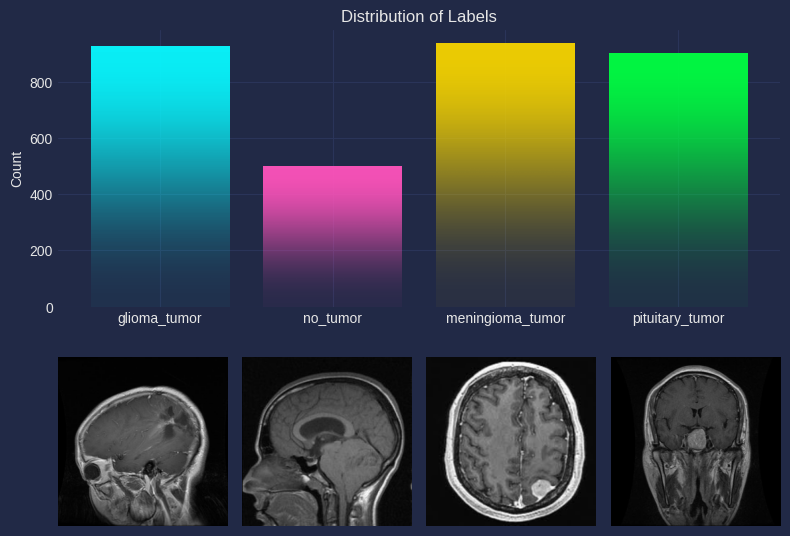

In [14]:
# Calculate the bar plot for each label
label_counts = {label: np.sum(y_train == label) for label in labels}

# Plot the bar plot and sample images in one chart
plt.figure(figsize=(8, 6))

colors = ["C0", "C1", "C2", "C3"]

# Plot the histogram
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
# plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Plot sample images from each label
k = 0
for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            plt.subplot(2, 4, k + 5)
            plt.imshow(X_train[j])
            plt.axis('off')
            k += 1
            break
        j += 1

plt.tight_layout()
plt.show()

# Data augmentation

📌 **Data augmentation** is an important technique in deep learning for increasing and diversifying existing datasets. Instead of collecting new data, it involves transforming existing data to generate variations. This approach addresses the need for large and diverse datasets, which are required to train robust deep learning models. By augmenting the data, we can effectively increase dataset sizes and diversity, thereby improving the model's ability to generalize to different scenarios.

<p>&nbsp;</p>

*Source:[geeksforgeeks](https://www.geeksforgeeks.org/python-data-augmentation/)*

Overly extreme augmentation parameters can distort images, limiting the model's ability to generalize. For example, excessive rotation or zooming can obscure important image features, resulting in misclassifications.

In [15]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest')

datagen.fit(X_train)

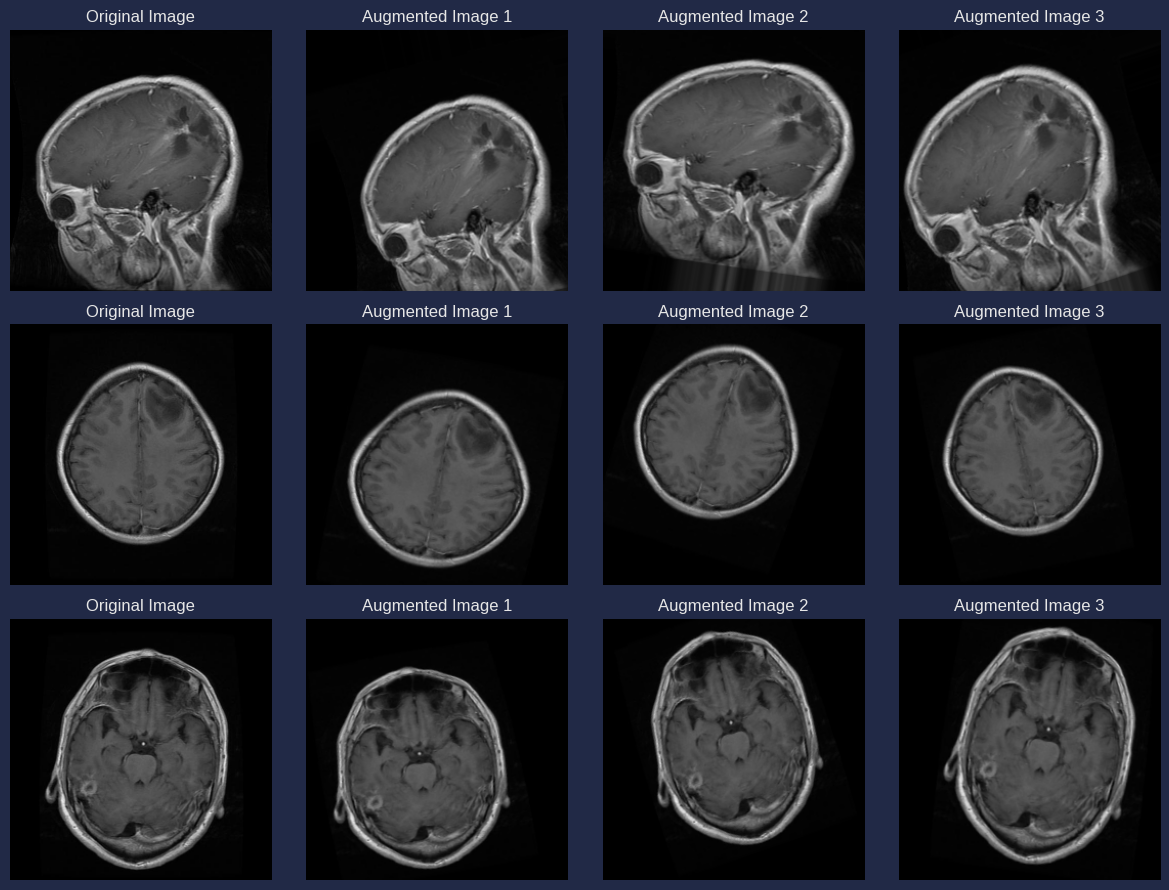

In [16]:
def visualize_augmented_images(image_generator, num_samples, num_augmented_images):
    augmented_images = []
    for sample in X_train[:num_samples]:

        # Create a list to store augmented versions of a sample
        augmented_samples = [sample]
        for _ in range(num_augmented_images):
            augmented_samples.append(image_generator.random_transform(sample))
        augmented_images.append(augmented_samples)

    # Plot original and augmented images
    fig, axes = plt.subplots(num_samples, num_augmented_images + 1, figsize=( 12, num_samples * 3))
    for i, sample in enumerate(augmented_images):
        for j, image in enumerate(sample):
            axes[i,j].imshow(image)
            if j == 0:
                axes[i, j].set_title('Original Image')
            else:
                axes[i,j].set_title(f'Augmented Image {j}')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

#Visualize augmented images to see how it works
visualize_augmented_images(datagen, num_samples=3, num_augmented_images=3)

# Data Preperation

In [17]:
# Convert y_train labels to one-hot encoded format using pandas
y_train = np.array(pd.get_dummies(y_train))

In [18]:
#Split the dataset into training, testing and validation sets
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(y_train).shape}\n'
      f'X_train shape: {(X_test).shape}\n'
      f'y_train shape: {(y_test).shape}\n'
      f'y_train shape: {(X_valid).shape}\n'
      f'X_train shape: {(y_valid).shape}')

X_train shape: (2643, 256, 256, 3)
y_train shape: (2643, 4)
X_train shape: (327, 256, 256, 3)
y_train shape: (327, 4)
y_train shape: (294, 256, 256, 3)
X_train shape: (294, 4)


# Normalization

In [19]:
# Normalize pixel values of training images to the range [0,1]
X_train = X_train / 255
X_test = X_test / 255
X_valid = X_valid / 255

print(f"Maximum and Minimum pixel value after normalization: {X_train.max()} - {X_train.min()}")

Maximum and Minimum pixel value after normalization: 1.0 - 0.0


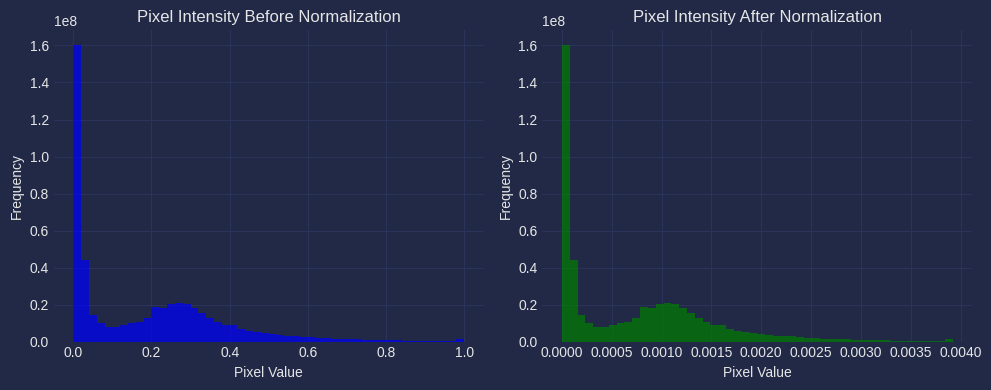

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X_train.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Before Normalization")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist((X_train/255).ravel(), bins=50, color='green', alpha=0.7)
plt.title("Pixel Intensity After Normalization")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
